In [1099]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.usetex'] = True

T = 2000
dt = 0.2
N = 20

gamma = 1
Kc = 2 * gamma
multiplier = 1.01
K = multiplier * Kc
mu = (K - Kc) / Kc
phase_list = np.random.uniform(-np.pi / 2, np.pi / 2, N)
U = np.random.uniform(0, 1, N)
omega_list = gamma * np.tan(np.pi * U)
dtheta_dt = np.zeros_like(omega_list)

t_list = np.linspace(0, T, int(T / dt))
r_list = np.zeros(len(t_list))

# r when t=0
real_part = np.sum(np.cos(phase_list))
imaginary_part = np.sum(np.sin(phase_list))

for t in tqdm(range(len(t_list))):
    for i in range(N):
        omega = omega_list[i]
        phase = phase_list[i]
        dtheta_dt[i] = omega + (K / N) * np.sum(np.sin(phase_list - phase))

    phase_list = phase_list + dtheta_dt * dt
    real_part = np.sum(np.cos(phase_list)) / N
    imaginary_part = np.sum(np.sin(phase_list)) / N
    r_list[t] = np.sqrt(real_part ** 2 + imaginary_part ** 2)



  0%|          | 0/10000 [00:00<?, ?it/s]

-44.2925093173601

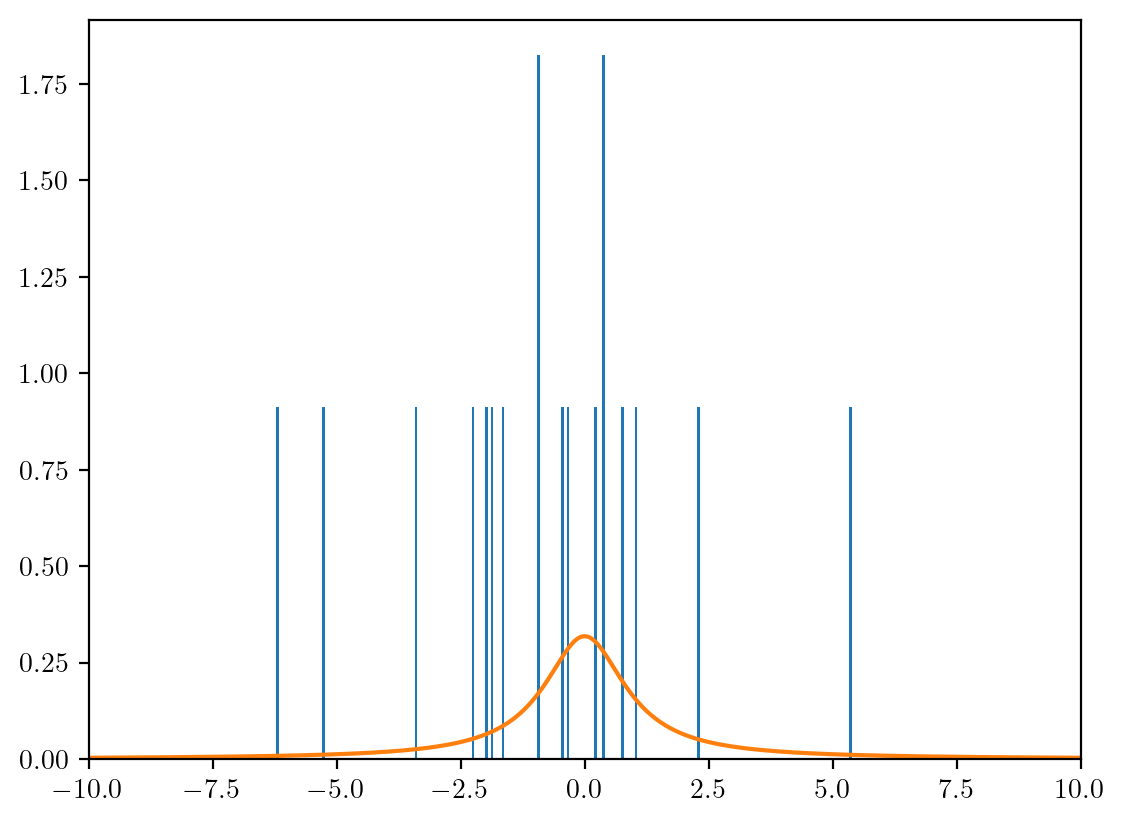

In [1100]:
bounds = 10
xmin, xmax = -bounds, bounds
plt.hist(omega_list, 1000, density=True)
plt.xlim(xmin=xmin, xmax = xmax)

omega_sweep = np.linspace(xmin, xmax, num=1000)
g = (gamma / np.pi) / (omega_sweep ** 2 + gamma ** 2)

plt.plot(omega_sweep, g)

np.mean(omega_list)
np.min(omega_list)

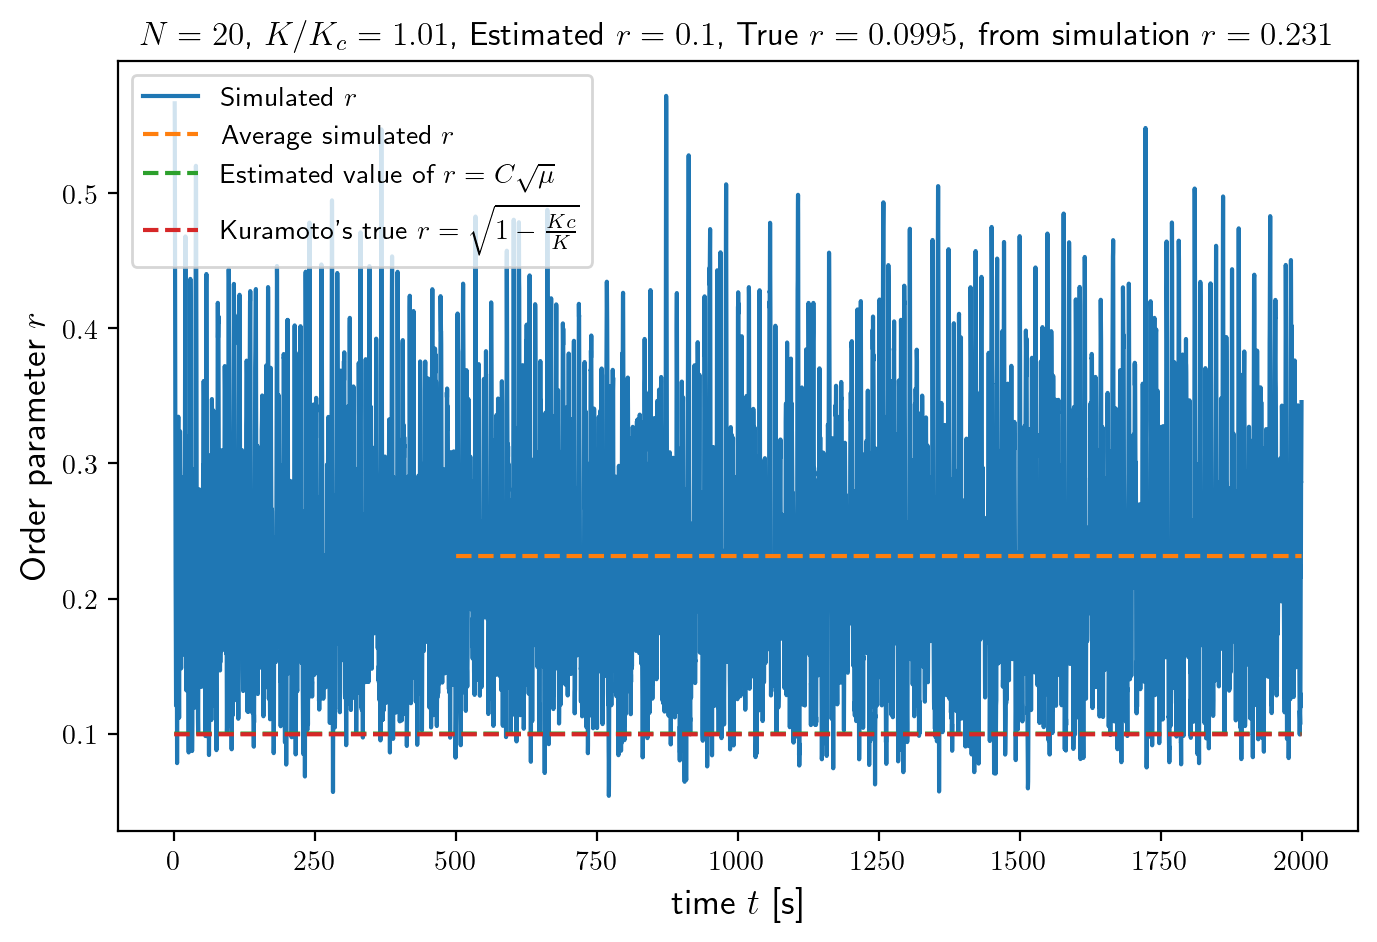

In [1101]:
import pandas as pd

fig, ax = plt.subplots(figsize=(8, 5))

rDF = pd.DataFrame(r_list)
window = int(T * dt * N / 1000)
window = 5
rDF_moving_average = rDF.rolling(window=window).mean()

# ax.plot(t_list, r_list, label=r'Simulated $r$ vs. $t$')
ax.plot(t_list, rDF_moving_average, label=r"Simulated $r$")
ax.set_xlabel("time $t$ [s]", fontsize=13)
ax.set_ylabel("Order parameter $r$", fontsize=13)

simulatedAverage = np.mean(r_list[int(len(t_list) * 0.25) :])

ax.plot(
    t_list[int(len(t_list) * 0.25) :],
    simulatedAverage * np.ones_like(t_list[int(len(t_list) * 0.25) :]),
    linestyle="--",
    label=r"Average simulated $r$",
)

r_est = np.sqrt(K / Kc - 1)
ax.plot(
    t_list,
    r_est * np.ones_like(t_list),
    linestyle="--",
    label=r"Estimated value of $r = C \sqrt{\mu}$",
)

r_true = np.sqrt(1 - Kc / K)
ax.plot(
    t_list,
    r_true * np.ones_like(t_list),
    linestyle="--",
    label=r"Kuramoto's true $r = \sqrt{1 - \frac{Kc}{K}}$",
)

ax.set_title(
    r"$N={}$, $K/K_c={}$, Estimated $r={}$, True $r = {}$, from simulation $r={}$".format(
        N, multiplier, round(r_est, 4), round(r_true, 4), round(simulatedAverage, 3)
    )
)
plt.legend()


plt.show()


In [1102]:
# mul = np.linspace(1,2)
# K = mul * Kc

# r_analytic = np.sqrt(Kc**2 * (K - Kc) / K**3)
# print(r_analytic)
# r_cauchy = np.sqrt(1 - Kc / K)
# r_cauchy

# plt.plot(K, r_cauchy)
# plt.plot(K, r_analytic)

In [1103]:
K = multiplier * Kc